In [1]:
%run /Users/renero/Documents/SideProjects/sailboatsfactory/notebooks/experimental/data.py
%run /Users/renero/Documents/SideProjects/sailboatsfactory/notebooks/experimental/compute.py
%run /Users/renero/Documents/SideProjects/sailboatsfactory/notebooks/experimental/lstm.py
%run /Users/renero/Documents/SideProjects/sailboatsfactory/notebooks/experimental/plot.py

Using TensorFlow backend.


1st layer return sequence: False
Adding layer #1 [1024]
Epoch 1/20
2238/2238 [==============================] - 36s - loss: 0.0758    
Epoch 2/20
2238/2238 [==============================] - 35s - loss: 0.0461    
Epoch 3/20
2238/2238 [==============================] - 35s - loss: 0.0427    
Epoch 4/20
2238/2238 [==============================] - 35s - loss: 0.0411    
Epoch 5/20
2238/2238 [==============================] - 35s - loss: 0.0402    
Epoch 6/20
2238/2238 [==============================] - 35s - loss: 0.0405    
Epoch 7/20
2238/2238 [==============================] 

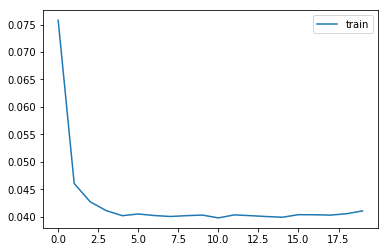

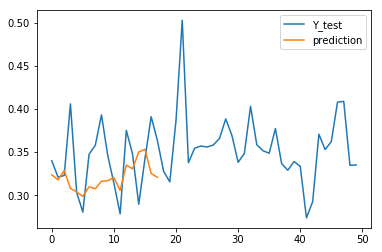

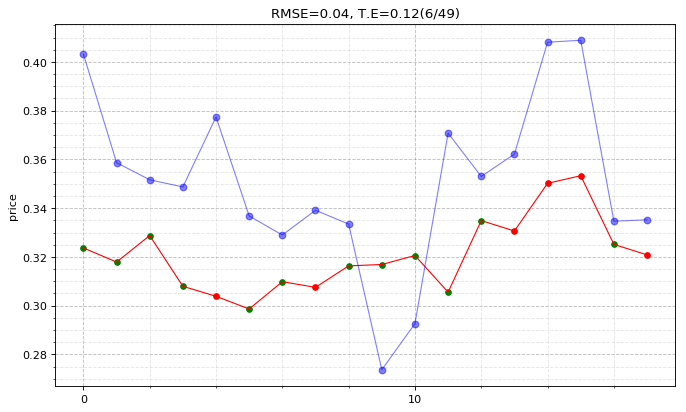

In [3]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np
from numpy import array, empty
from numpy.random import seed
from os.path import join
from os import getcwd
from pandas import read_csv, concat, DataFrame
from random import randint
from random import uniform
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow import set_random_seed
from yaml import load

import compute
import data
import lstm
import plot

# Initialization of seeds
set_random_seed(2)
seed(2)

params = lstm.parameters()
raw = data.read(params)
X_train, Y_train, X_test, Y_test = data.prepare(raw, params)
model = lstm.build(params)

train_loss = model.fit(
    X_train,
    Y_train,
    shuffle=params['lstm_shuffle'],
    batch_size=params['lstm_batch_size'],
    epochs=params['lstm_num_epochs'])#,
    #validation_split=params['validation_ratio'])
plot.history(train_loss)

# Plot the test values for Y, and Y_hat, without scaling (inverted)
Y_hat = model.predict(X_test[32:], batch_size=params['lstm_batch_size'])

# Y_test_inv = params['y_scaler'].inverse_transform(Y_test)
# Y_hat_inv = params['y_scaler'].inverse_transform(Y_hat)
plot.curves(Y_test, Y_hat, labels=['Y_test', 'prediction'])

# Plot the raw values, whithout differencing.
# Y_test_raw = raw.values[-params['num_testcases']:, 0].reshape((params['num_testcases'], 1))
# Y_hat_raw = data.inv_diff(Y_hat_inv[-1:], Y_test_raw)
rmse, trend_error = compute.error(Y_test[32:], Y_hat)
plot.prediction(Y_test[32:], Y_hat,
                title='RMSE={:.02f}, T.E={:.02f}({:d}/{:d})'.
                format(rmse,
                       (trend_error/(len(Y_test))),
                       trend_error, len(Y_test) - 1))